To Classify SMS as Spam or Non-Spam 

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn. feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\MOHIT TARADE'

In [3]:
sms=pd.read_csv(r'Spam.csv',header=0,names=['SMS','Label'])
print(sms.shape)
sms.head(10)

(5574, 2)


,SMS,Label
0,"Go until jurong point, crazy.. Available only ...",Ham
1,Ok lar... Joking wif u oni...\n,Ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,Spam
3,U dun say so early hor... U c already then say...,Ham
4,"Nah I don't think he goes to usf, he lives aro...",Ham
5,FreeMsg Hey there darling it's been 3 week's n...,Spam
6,Even my brother is not like to speak with me. ...,Ham
7,As per your request 'Melle Melle (Oru Minnamin...,Ham
8,WINNER!! As a valued network customer you have...,Spam
9,Had your mobile SpamSpam months or more? U R e...,Spam


Data Processing

In [4]:
sms['Label'].replace('Ham',0, inplace=True)
sms['Label'].replace('Spam',1, inplace=True)

In [5]:
sms.columns=['Message','label']
sms

,Message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [6]:
sms.describe()*100

,label
count,557400.000000
mean,13.401507
std,34.069907
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


In [7]:
sms.label.value_counts()

label
0    4827
1     747
Name: count, dtype: int64

Saperating spam and ham messages

In [8]:
spamsms=sms.loc[sms['label']==1]
nospamsms=sms.loc[sms['label']==0]

In [9]:
spamsms

,Message,label
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,FreeMsg Hey there darling it's been 3 week's n...,1
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile SpamSpam months or more? U R e...,1
11,SIX chances to win CASH! From SpamHamHam to 2H...,1
...,...,...
5539,Want explicit SEX in 3Ham secs? Ring Ham2Ham73...,1
5542,ASKED 3MOBILE IF Ham87Ham CHATLINES INCLU IN F...,1
5549,Had your contract mobile SpamSpam Mnths? Lates...,1
5568,REMINDER FROM O2: To get 2.5Ham pounds free ca...,1


In [10]:
nospamsms.head()

,Message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
6,Even my brother is not like to speak with me. ...,0


In [11]:
spamsms['len']=[len(x) for x in spamsms['Message']]

In [12]:
spamsms.head()

,Message,label,len
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,181
5,FreeMsg Hey there darling it's been 3 week's n...,1,153
8,WINNER!! As a valued network customer you have...,1,183
9,Had your mobile SpamSpam months or more? U R e...,1,171
11,SIX chances to win CASH! From SpamHamHam to 2H...,1,166


In [13]:
spamavg=spamsms.len.mean()
spamavg

154.2904953145917

In [14]:
nospamsms['len'] = [len(x) for x in nospamsms["Message"]] 

In [15]:
nospamsms.head()

,Message,label,len
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
3,U dun say so early hor... U c already then say...,0,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62
6,Even my brother is not like to speak with me. ...,0,78


In [16]:
nospamavg=nospamsms.len.mean()
nospamavg

72.61984669567019

In [17]:
sms['length'] = sms['Message'].apply(lambda x: len("".join([a for a in x if a.isdigit()]))) 
print (np.mean (sms ['length'][sms['label'] == 0]), np. mean (sms['length'][sms['label'] == 1])) 
print (sms.head (10))

0.24901595193702092 9.562248995983936
                                             Message  label  length
0  Go until jurong point, crazy.. Available only ...      0       0
1                    Ok lar... Joking wif u oni...\n      0       0
2  Free entry in 2 a wkly comp to win FA Cup fina...      1      15
3  U dun say so early hor... U c already then say...      0       0
4  Nah I don't think he goes to usf, he lives aro...      0       0
5  FreeMsg Hey there darling it's been 3 week's n...      1       2
6  Even my brother is not like to speak with me. ...      0       0
7  As per your request 'Melle Melle (Oru Minnamin...      0       1
8  WINNER!! As a valued network customer you have...      1       9
9  Had your mobile SpamSpam months or more? U R e...      1       6


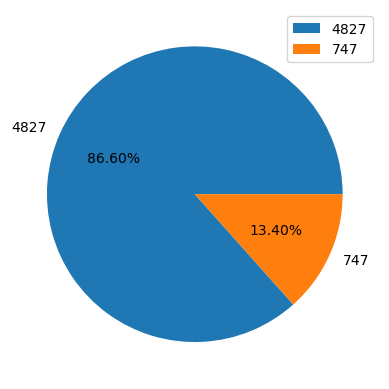

In [18]:
plt.pie(sms.label.value_counts(), labels=sms.label.value_counts(), autopct="%.2f%%")
plt.legend()
plt.show()

Data Modelling

In [19]:
#Train Test split

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(sms['Message'],sms['label'], test_size = 0.25, random_state = 42 )

Fitting and transforming X_train using a Count Vectorizer with default parameters

In [22]:
xtrain_vect=cv.fit_transform(x_train)
xtrain_vect

<4180x7463 sparse matrix of type '<class 'numpy.int64'>'
	with 55690 stored elements in Compressed Sparse Row format>

In [23]:
x_train

4044    I am literally in bed and have been up for lik...
2586       I will be outside office take all from there\n
5159                            K k:) sms chat with me.\n
585     So how's scotland. Hope you are not over showi...
4574    "URGENT! This is the 2nd attempt to contact U!...
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191    ree entry in 2 a weekly comp for a chance to w...
5226    "OH FUCK. JUSWOKE UP IN A BED ON A BOATIN THE ...
5390           NOT MUCH NO FIGHTS. IT WAS A GOOD NITE!!\n
860             Did he just say somebody is named tampa\n
Name: Message, Length: 4180, dtype: object

In [24]:
y_train

4044    0
2586    0
5159    0
585     0
4574    1
       ..
3772    0
5191    1
5226    0
5390    0
860     0
Name: label, Length: 4180, dtype: int64

Fitting and Transforming X_train using a Count Vectorizer with default parameters 

In [25]:
model = sklearn.naive_bayes.MultinomialNB(alpha=0.1)
model_fit = model.fit (xtrain_vect, y_train) 

In [26]:
predictions = model.predict(CountVectorizer().fit(x_train).transform(x_test))
aucscore = roc_auc_score(y_test, predictions)
aucscore

0.9656769942508476

In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [28]:
def draw_confusion_matrix(y_true, y_pred, c_matrix_for):
    labels = ['Ham', 'Spam']
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='.4g', xticklabels=labels, 
    yticklabels=labels, cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {c_matrix_for}')
    plt.show()

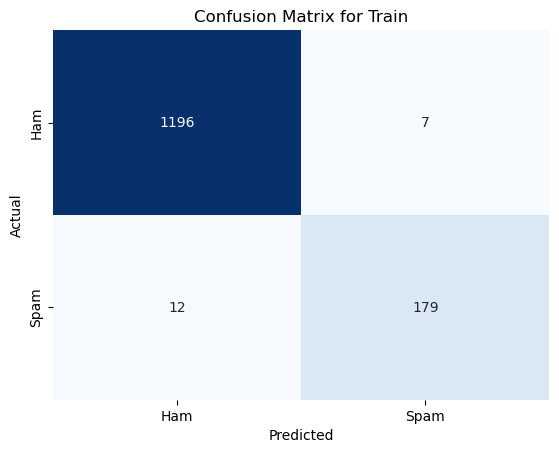

In [29]:
draw_confusion_matrix(y_test, predictions, c_matrix_for='Train')

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1203
           1       0.96      0.94      0.95       191

    accuracy                           0.99      1394
   macro avg       0.98      0.97      0.97      1394
weighted avg       0.99      0.99      0.99      1394



In [31]:
print("Test accuracy:", accuracy_score(y_test, predictions))

Test accuracy: 0.9863701578192252


SVM
     Fit and Transfer xtrain and xtest

In [32]:
vectorizer = TfidfVectorizer (min_df=5)
x_train_vect = vectorizer.fit_transform (x_train) 
x_test_vect = vectorizer.transform(x_test) 

In [33]:
clf = SVC (C=10000)
clf.fit (x_train_vect, y_train)

SVC(C=10000)

In [34]:
y_predicted = clf.predict(x_test_vect)

In [35]:
roc_auc_score (y_test, y_predicted)

0.9554973821989529

In [36]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1203
           1       1.00      0.91      0.95       191

    accuracy                           0.99      1394
   macro avg       0.99      0.96      0.97      1394
weighted avg       0.99      0.99      0.99      1394



In [37]:
print("Test accuracy:", accuracy_score(y_test, y_predicted))

Test accuracy: 0.9878048780487805


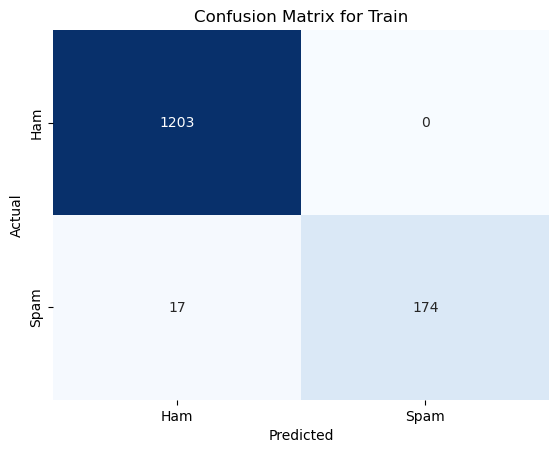

In [38]:
draw_confusion_matrix(y_test, y_predicted, c_matrix_for='Train')

Logistic Regression Model with ngrams 

In [39]:
vectorizer = TfidfVectorizer (min_df=5, ngram_range=(1,3)) 
clf = LogisticRegression (C=100) 
x_train_transformed = vectorizer.fit_transform(x_train)  
x_test_transformed = vectorizer.transform (x_test) 
clf.fit (x_train_transformed, y_train) 
y_predictedl = clf. predict (x_test_transformed) 
roc_auc_score(y_test, y_predicted)

0.9554973821989529

In [40]:
print(classification_report(y_test, y_predictedl))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1203
           1       0.98      0.93      0.95       191

    accuracy                           0.99      1394
   macro avg       0.98      0.96      0.97      1394
weighted avg       0.99      0.99      0.99      1394



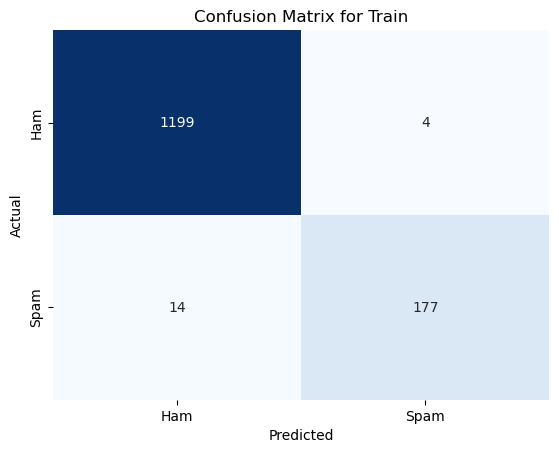

In [41]:
draw_confusion_matrix(y_test, y_predictedl, c_matrix_for='Train')

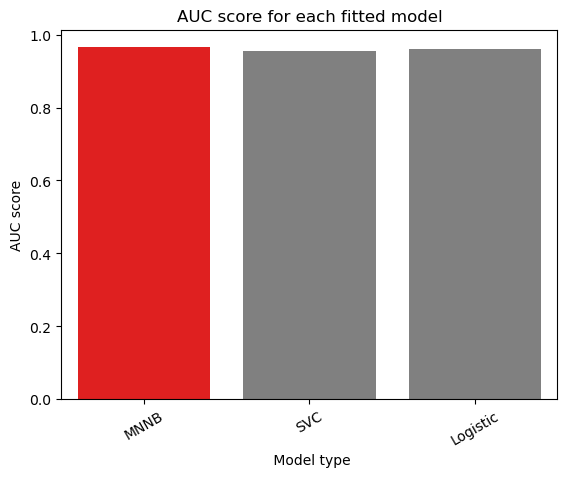

In [42]:
label = ['MNNB', 'SVC', 'Logistic'] 
auclist = [0.9656769942508476,0.9554973821989529,0.9616882749496242]  

def plot_bar_x():
    index = np.arange(len(label)) 
    clrs =['grey' if (x < max(auclist)) else 'red' for x in auclist] 
    g=sns.barplot (x=index, y=auclist, palette=clrs) # color=cLrs)
    plt.xlabel(' Model type', fontsize=10)
    plt.ylabel('AUC score', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30) 
    plt.title('AUC score for each fitted model')

plot_bar_x()

Thank You.....